#Importing Libraries

In [1]:
import tensorflow
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


#Using Keras to load dataset

In [2]:
fashion = keras.datasets.fashion_mnist
(x_train_full,y_train_full),(x_test,y_test) = fashion.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
# x_train_full = x_train_full.reshape((x_train_full.shape[0], 128, 128, 1))

In [4]:
x_train_full[0].shape

(28, 28)

In [5]:
x_train_full

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [6]:
x_test

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

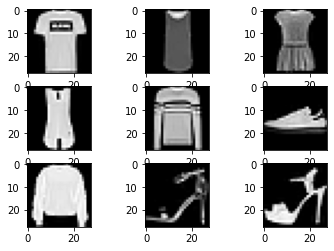

In [7]:
for i in range(1, 10):
    plt.subplot(3, 3, i)
    plt.imshow(x_train_full[i], cmap=plt.get_cmap('gray'))
 
# Display the entire plot
plt.show()

In [8]:
print(fashion)

<module 'keras.api._v2.keras.datasets.fashion_mnist' from '/usr/local/lib/python3.7/dist-packages/keras/api/_v2/keras/datasets/fashion_mnist/__init__.py'>


In [9]:
x_train_full.shape

(60000, 28, 28)

In [10]:
x_train_full.dtype

dtype('uint8')

In [11]:
x_valid, x_train = x_train_full[:5000]/255.0, x_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [12]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneakers", "Bag", "Ankle boot"]

In [13]:
class_names[y_train[0]]

'Coat'

#Creating the model using sequential API

##Method 1 to create a DNN

In [14]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape = [28,28]))
model.add(keras.layers.Dense(300,activation='relu'))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

##Method 2 to create a DNN (Preferred)

In [15]:
# 300,100 and 10 respectively refers to the number of neurons

model = keras.models.Sequential([
                                 keras.layers.Flatten(input_shape = [28,28]),
                                 keras.layers.Dense(300,activation='relu'),
                                 keras.layers.Dense(100,activation='relu'),
                                 keras.layers.Dense(10, activation='softmax')
])

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.layers

In [18]:
hidden1 = model.layers[1]
hidden1.name

'dense_3'

In [19]:
# model.get_layer('dense_24') is hidden1

In [20]:
weight,biases = hidden1.get_weights()

In [21]:
weight

array([[-0.02658181, -0.02768224, -0.06978568, ...,  0.0019372 ,
        -0.06906026, -0.06801578],
       [ 0.04092894, -0.00151547,  0.04341467, ..., -0.03114669,
         0.02743188,  0.05410579],
       [-0.02276043,  0.04497027,  0.05318946, ..., -0.06865731,
        -0.00487456, -0.03970067],
       ...,
       [ 0.06932065, -0.02872975,  0.06560725, ..., -0.01467832,
        -0.00637966,  0.00535506],
       [ 0.00759519,  0.02328528, -0.01955426, ...,  0.01832533,
         0.0126983 , -0.03063067],
       [-0.01449502, -0.05153198, -0.0146107 , ..., -0.02850179,
         0.01040824, -0.03772939]], dtype=float32)

In [22]:
weight.shape

(784, 300)

In [23]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [24]:
biases.shape

(300,)

#Compiling thee model

In [25]:
model.compile(loss = "sparse_categorical_crossentropy",
              optimizer = "sgd",
              metrics=["accuracy"]
)

#Training and Evaluating the model

In [26]:
history = model.fit(x_train,y_train,epochs=29,validation_data=(x_valid,y_valid))

Epoch 1/29
1719/1719 [==============================] - 9s 5ms/step - loss: 0.7196 - accuracy: 0.7603 - val_loss: 0.5010 - val_accuracy: 0.8318
Epoch 2/29
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4919 - accuracy: 0.8283 - val_loss: 0.4483 - val_accuracy: 0.8508
Epoch 3/29
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4436 - accuracy: 0.8453 - val_loss: 0.4287 - val_accuracy: 0.8524
Epoch 4/29
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4177 - accuracy: 0.8541 - val_loss: 0.3956 - val_accuracy: 0.8642
Epoch 5/29
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3961 - accuracy: 0.8611 - val_loss: 0.3869 - val_accuracy: 0.8642
Epoch 6/29
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3794 - accuracy: 0.8651 - val_loss: 0.3740 - val_accuracy: 0.8700
Epoch 7/29
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3650 - accuracy: 0.8708 - val_loss: 0.3668 - val_accuracy:

<function matplotlib.pyplot.show(*args, **kw)>

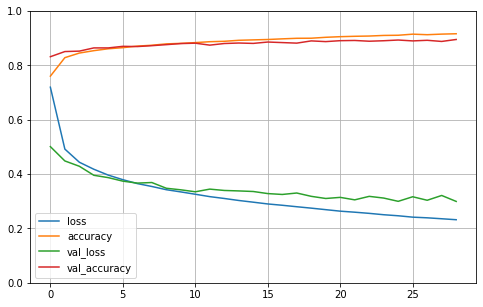

In [27]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show

In [28]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 62.9508 - accuracy: 0.8463


[62.95076370239258, 0.8463000059127808]

#Using the model to make predictions

In [29]:
x_new = x_test[:3]
y_prob = model.predict(x_new)
y_prob.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [30]:
x_new

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

In [32]:
import cv2
IMAGE_CHANNEL = 1
def prepare(filepath):
    IMG_SIZE = 28
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, IMAGE_CHANNEL)

filepath = '/content/white_tshirt.jpeg'

new_arr = prepare(filepath)

In [33]:
y_pred_ts = model.predict(new_arr)
y_pred_ts=np.argmax(y_pred_ts,axis=1)
y_pred_ts

array([6])

In [34]:
np.array(class_names)[y_pred_ts]

array(['Shirt'], dtype='<U11')

In [ ]:
# items = []
# for i in np.array(class_names)[y_pred_ts]:
#   items.append(i)

# items

In [ ]:
# # y_pred = (model.predict(x_new) > 0.5).astype("int32")
# y_pred=model.predict(x_new)
# y_pred=np.argmax(y_pred,axis=1)
# y_pred

In [ ]:
# np.array(class_names)[y_pred]

In [ ]:
# y_test[:3]

In [ ]:
# y_new = y_test[:3]
# y_new

In [ ]:
# np.array(class_names)[y_new]

In [ ]:
# credits = [["T-shirt/top",20], ["Trouser",40], ["Pullover",50], ["Dress",50], ["Coat",70], ["Sandal",45], ["Shirt",30], ["Sneakers",70], ["Bag",40], ["Ankle boot",50]]

In [ ]:
# sum=0
# item = items[0]
# for i in credits:
#   if i[0]==item:
#     sum+=i[1]

# sum

In [35]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")

In [36]:
from tensorflow.keras.models import model_from_json 

json_file = open('model.json','r')
loaded_model_json = json_file.read()
json_file.close()

loaded_model = model_from_json(loaded_model_json)

loaded_model.load_weights("model.h5")
print("Loaded Model from disk")

loaded_model.compile(loss='sparse_categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

Loaded Model from disk


In [37]:
!pip install flask-ngrock
!pip install flask-bootstrap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement flask-ngrock (from versions: none)
ERROR: No matching distribution found for flask-ngrock
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 456 kB 3.3 MB/s 
  Created wheel for flask-bootstrap: filename=Flask_Bootstrap-3.3.7.1-py3-none-any.whl size=460123 sha256=0cdead588b5cc90f06e1a1d30db3b0e2260ccb2ee5e818f2ce72b95e6eb5321c
  Stored in directory: /root/.cache/pip/wheels/67/a2/d6/50d039c9b59b4caca6d7b53839c8100354a52ab7553d2456eb
  Created wheel for visitor: filename=visitor-0.1.3-py3-none-any.whl size=3946 sha256=9ffdf9814b78e053bb1f4b5fbc1fb2aa25b93dab5e3d0565aa9ee1be3df98166
  Stored in directory: /root/.cache/pip/wheels/64/34/11/053f47218984c9a31a00f911ed98dda036b867481dcc527a12
Successfully built flask-bootstrap visitor


In [38]:
!pip install -U scipy==1.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 26.6 MB 20.8 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pymc3 3.11.5 requires scipy<1.8.0,>=1.7.3, but you have scipy 1.2.0 which is incompatible.
plotnine 0.8.0 requires scipy>=1.5.0, but you have scipy 1.2.0 which is incompatible.
jaxlib 0.3.14+cuda11.cudnn805 requires scipy>=1.5, but you have scipy 1.2.0 which is incompatible.
jax 0.3.14 requires scipy>=1.5, but you have scipy 1.2.0 which is incompatible.


In [ ]:
import numpy as np
import tensorflow.keras.models
from tensorflow.keras.models import model_from_json
from scipy.misc import imread, imresize,imshow
import tensorflow as tf


def init(): 
	json_file = open('model.json','r')
	loaded_model_json = json_file.read()
	json_file.close()
	loaded_model = model_from_json(loaded_model_json)
	#load weights into new model
	loaded_model.load_weights("model.h5")
	print("Loaded Model from disk")

	#compile and evaluate loaded model
	loaded_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
	#loss,accuracy = model.evaluate(X_test,y_test)
	#print('loss:', loss)
	#print('accuracy:', accuracy)
	graph = tf.compat.v1.get_default_graph()

	return loaded_model,graph

In [ ]:
from flask import Flask, render_template, request
from scipy.misc import imsave, imread, imresize
import numpy as np
import tensorflow.keras.models
import re
import sys 
import os
import base64
sys.path.append(os.path.abspath("./model"))
# from load import * 


global graph, fmodel

model, graph = init()

app = Flask(__name__)


@app.route('/')
def index_view():
    return render_template('index.html')

def convertImage(imgData1):
	imgstr = re.search(b'base64,(.*)',imgData1).group(1)
	with open('output.png','wb') as output:
	    output.write(base64.b64decode(imgstr))

@app.route('/predict/',methods=['GET','POST'])
def predict():
	imgData = request.get_data()
	convertImage(imgData)
	x = imread('output.png',mode='L')
	x = np.invert(x)
	x = imresize(x,(28,28))
	x = x.reshape(1,28,28,1)

	with graph.as_default():
		out = model.predict(x)
		print(out)
		print(np.argmax(out,axis=1))

		response = np.array_str(np.argmax(out,axis=1))
		return response	

if __name__ == '__main__':
    app.run(debug=True, port=8000)

In [ ]:
from flask import Flask, render_template, request

@app.route('/')
def index_view():
    return render_template('index.html')


@app.route('/predict/',methods=['GET','POST'])
def predict():
	response = "For ML Prediction"
return response	

if __name__ == '__main__':
    app.run(debug=True, port=8000)